In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

In [2]:
transaction_data = pd.read_csv(r'C:\Users\alons\retailer_mb\Market Basket Analysis.csv')

transaction_data.head()


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
transaction_data.dtypes

BillNo          int64
Itemname       object
Quantity        int64
Date           object
Price         float64
CustomerID    float64
Country        object
dtype: object

In [4]:
#change data type for date
transaction_data['Date'] = pd.to_datetime(transaction_data['Date'])
transaction_data['month'] = transaction_data['Date'].dt.month
print(transaction_data.head())

   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  month  
0   2.55     17850.0  United Kingdom     12  
1   3.39     17850.0  United Kingdom     12  
2   2.75     17850.0  United Kingdom     12  
3   3.39     17850.0  United Kingdom     12  
4   3.39     17850.0  United Kingdom     12  


In [5]:
transaction_data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


In [6]:
#checking for null values
transaction_data.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134038
Country            0
month              0
dtype: int64

In [7]:
transaction_data.shape

(522061, 8)

In [8]:
#drop all empty 'itemname'
transaction_data.dropna(subset=['Itemname'], inplace=True)
transaction_data.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132583
Country            0
month              0
dtype: int64

In [9]:
#'CustomerID' becomes a binary value
transaction_data['CustomerID'].fillna(0, inplace=True)
transaction_data['CustomerID'] = transaction_data['CustomerID'].apply(lambda x: 1 if x != 0 else 0)
transaction_data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
month         0
dtype: int64

In [10]:
transaction_data['Price'].describe()

count    520606.000000
mean          3.858767
std          32.484101
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: Price, dtype: float64

In [11]:
unique_item_count = transaction_data['Itemname'].nunique()
print("total unique items sold:", unique_item_count)

total unique items sold: 4175


In [12]:
items_count= transaction_data['Itemname'].value_counts()
print(items_count)

Itemname
WHITE HANGING HEART T-LIGHT HOLDER     2269
JUMBO BAG RED RETROSPOT                2087
REGENCY CAKESTAND 3 TIER               1930
PARTY BUNTING                          1677
LUNCH BAG RED RETROSPOT                1570
                                       ... 
found box                                 1
HAYNES CAMPER SHOULDER BAG                1
for online retail orders                  1
add stock to allocate online orders       1
PAPER CRAFT  LITTLE BIRDIE                1
Name: count, Length: 4175, dtype: int64


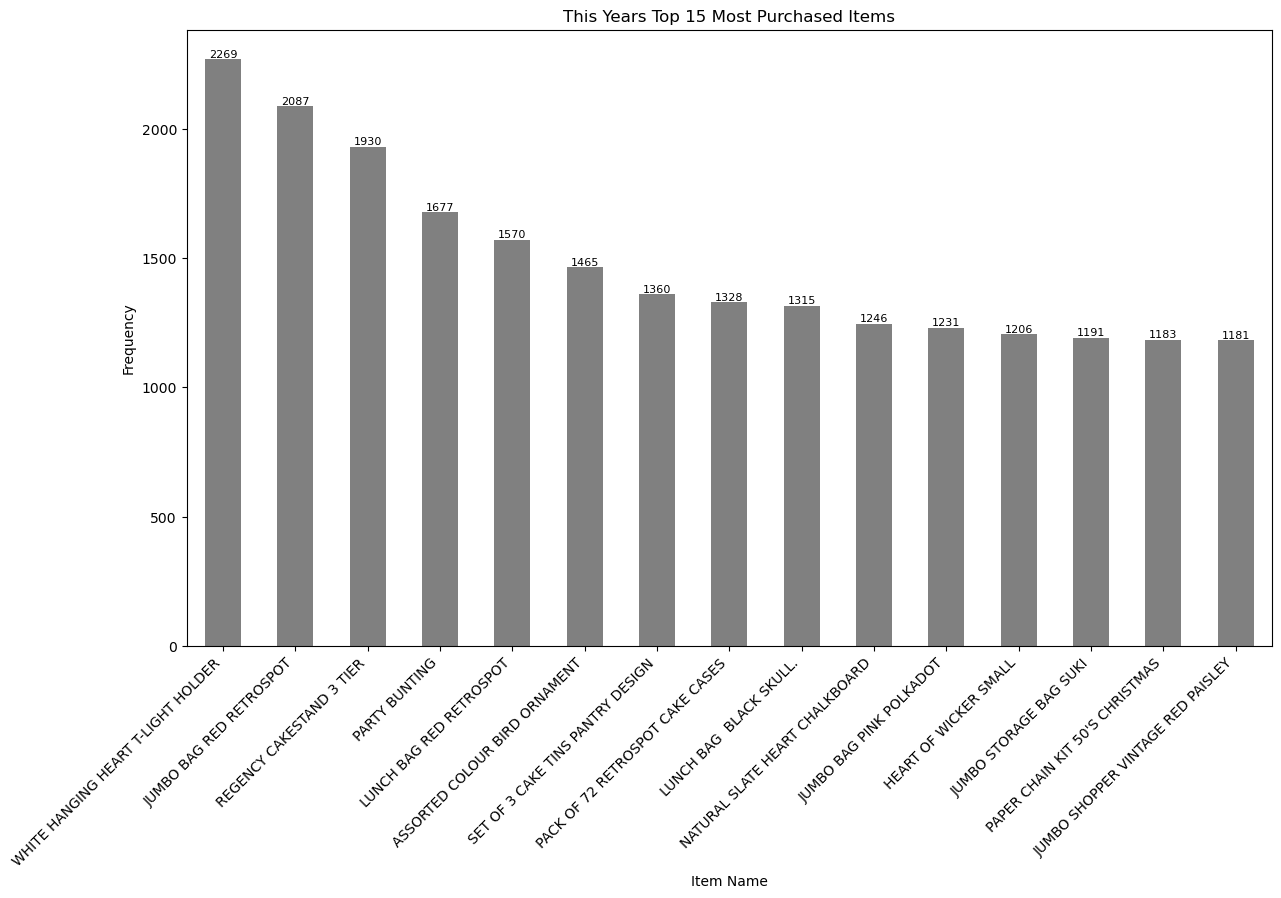

In [13]:
plt.figure(figsize=(14, 8))
top_items = transaction_data['Itemname'].value_counts().head(15)
top_items.plot(kind='bar', color='grey')
plt.title('This Years Top 15 Most Purchased Items')
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

for i, freq in enumerate(top_items):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=8)

plt.show()

In [14]:
#getting total spent per entry (items*price) 
transaction_data['Total'] = transaction_data['Quantity'] * transaction_data['Price']
transaction_data[:5]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,month,Total
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,1,United Kingdom,12,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,1,United Kingdom,12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,1,United Kingdom,12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,1,United Kingdom,12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,1,United Kingdom,12,20.34


In [15]:
#Creating the transactional data into basket structure
basket = (transaction_data.groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))
basket[:]

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
items_frequency= items_count/len(basket)
items_frequency[:5]

Itemname
WHITE HANGING HEART T-LIGHT HOLDER    0.112299
JUMBO BAG RED RETROSPOT               0.103291
REGENCY CAKESTAND 3 TIER              0.095521
PARTY BUNTING                         0.082999
LUNCH BAG RED RETROSPOT               0.077704
Name: count, dtype: float64

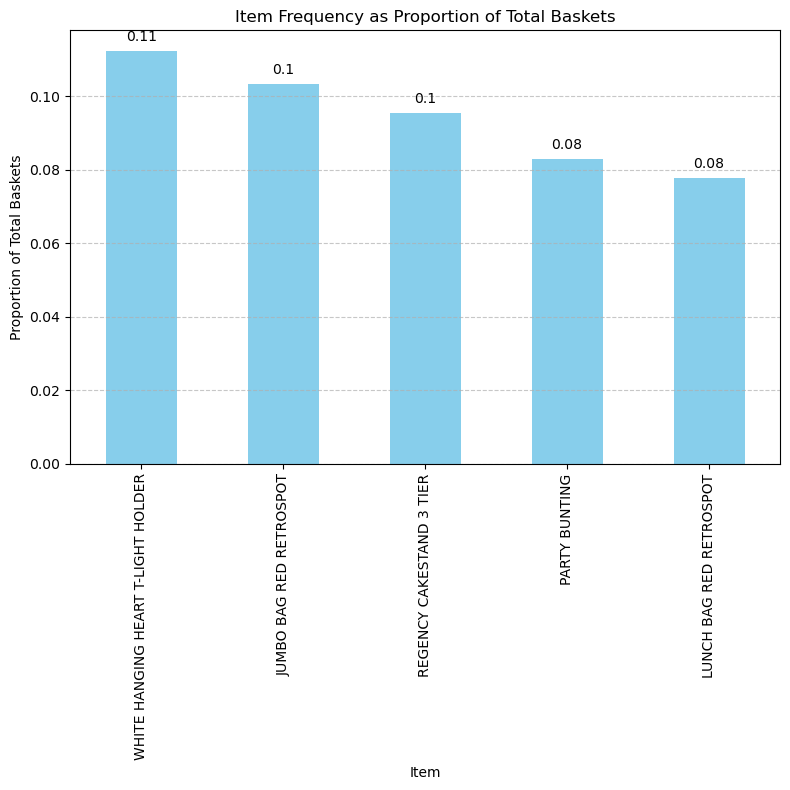

In [17]:
#plot the 5 most frequently purchased item
plt.figure(figsize=(8, 8))
ax = items_frequency[:5].plot(kind='bar', color='skyblue')
plt.title('Item Frequency as Proportion of Total Baskets')
plt.xlabel('Item')
plt.ylabel('Proportion of Total Baskets')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
#Basket Size Distribution 
basket_size=transaction_data.groupby('BillNo')['Quantity'].sum()
basket_size.describe()


count    20205.000000
mean       261.413462
std        963.835145
min      -9600.000000
25%         63.000000
50%        144.000000
75%        286.000000
max      80995.000000
Name: Quantity, dtype: float64

In [19]:
basket_size[:10]

BillNo
536365     40
536366     12
536367     83
536368     15
536369      3
536370    449
536371     80
536372     12
536373     88
536374     32
Name: Quantity, dtype: int64

In [20]:
basket_total= transaction_data.groupby('BillNo')['Total'].sum()
basket_total[:5]

BillNo
536365    139.12
536366     22.20
536367    278.73
536368     70.05
536369     17.85
Name: Total, dtype: float64

In [21]:
basket_total.describe()

count     20205.000000
mean        509.321104
std        1758.363978
min           0.000000
25%         138.870000
50%         297.000000
75%         475.240000
max      168469.600000
Name: Total, dtype: float64

In [22]:
#changes to monthly/ divinding the data and analyzing it seperately monthly


In [23]:
#january entries only
january_data=transaction_data[transaction_data['Date'].dt.month ==1]
print(january_data)

       BillNo                            Itemname  Quantity  \
41242  539993             JUMBO BAG PINK POLKADOT        10   
41243  539993                  BLUE POLKADOT WRAP        25   
41244  539993                  RED RETROSPOT WRAP        25   
41245  539993             RECYCLING BAG RETROSPOT         5   
41246  539993           RED RETROSPOT SHOPPER BAG        10   
...       ...                                 ...       ...   
75453  542745          BAKING SET SPACEBOY DESIGN         8   
75454  542745  FAIRY CAKE FLANNEL ASSORTED COLOUR        45   
75455  542745        BAKING SET 9 PIECE RETROSPOT        13   
75456  542746        REX CASH+CARRY JUMBO SHOPPER         2   
75457  542759        STRAWBERRY FAIRY CAKE TEAPOT         1   

                     Date  Price  CustomerID         Country  month  Total  
41242 2011-01-04 10:00:00   1.95           1  United Kingdom      1  19.50  
41243 2011-01-04 10:00:00   0.42           1  United Kingdom      1  10.50  
41244 2011-0

In [24]:
#January's item exploration
unique_item_count = january_data['Itemname'].nunique()
print("total unique items sold:", unique_item_count)

total unique items sold: 2529


In [25]:
items_count= january_data['Itemname'].value_counts()
print(items_count)

Itemname
WHITE HANGING HEART T-LIGHT HOLDER    177
SET OF 3 CAKE TINS PANTRY DESIGN      147
HEART OF WICKER SMALL                 143
REGENCY CAKESTAND 3 TIER              131
NATURAL SLATE HEART CHALKBOARD        124
                                     ... 
PACK/12 BLUE FOLKART CARDS              1
FOLK ART GREETING CARDpack/12           1
BLUE POLKADOT COFFEE MUG                1
FIRE POLISHED GLASS BRACELET RED        1
GREEN SQUARE COMPACT MIRROR             1
Name: count, Length: 2529, dtype: int64


In [26]:
january_data['Price'].describe()

count    34102.000000
mean         3.765227
std         11.835139
min          0.000000
25%          1.250000
50%          2.100000
75%          4.130000
max        557.000000
Name: Price, dtype: float64

In [27]:
#Basket Value Distribution
basket_total= january_data.groupby('BillNo')['Total'].sum()
basket_total[:10]

BillNo
539993    307.30
540001    474.66
540002    310.28
540003    368.80
540004     76.32
540005    190.56
540010      0.00
540012      0.00
540013    299.60
540014    339.68
Name: Total, dtype: float64

In [28]:
basket_total.describe()

count     1091.000000
mean       611.684940
std       2536.568074
min          0.000000
25%        160.215000
50%        305.070000
75%        511.175000
max      77183.600000
Name: Total, dtype: float64

In [29]:
#finds the number of baskets valued at < 0 
zero_total_baskets_count = (basket_total == 0).sum()
print(zero_total_baskets_count)


16


In [30]:
entries_with_zero_total = january_data[january_data['Total'] == 0]
print(entries_with_zero_total)

       BillNo                             Itemname  Quantity  \
41320  540010           reverse 21/5/10 adjustment      -100   
41322  540012           reverse 21/5/10 adjustment      -100   
42411  540100                                    ?      -106   
45228  540355          RED RETROSPOT CHARLOTTE BAG         1   
45322  540356          RED RETROSPOT CHARLOTTE BAG         1   
45713  540372              PAPER BUNTING RETROSPOT        24   
45715  540372               PLASTERS IN TIN SKULLS        24   
49357  540558                                    ?       -29   
49399  540564                  mouldy thrown away.     -2600   
49596  540638                              damages      -990   
50219  540651                                    ?      -290   
50302  540673                                found       144   
50303  540674                                Found        26   
50304  540675                                Found        40   
51869  540832        BLUE SPOT CERAMIC D

In [31]:
#Basket Size Distribution 
basket_size=january_data.groupby('BillNo')['Quantity'].sum()
basket_size[:5]

BillNo
539993    171
540001    270
540002    188
540003    140
540004     72
Name: Quantity, dtype: int64

In [32]:
basket_size.describe()

count     1091.000000
mean       340.723190
std       2305.977524
min      -2600.000000
25%         67.000000
50%        144.000000
75%        304.500000
max      74215.000000
Name: Quantity, dtype: float64

In [33]:
#Combined data into basket structure 
basket = (january_data.groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))


basket[:]

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,counted,damages,found,label mix up,mouldy thrown away.,reverse 21/5/10 adjustment,samples/damages
BillNo,,,,,,,,,,,,,,,,,,,,,
539993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542741,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#frequency of purchase
items_frequency= items_count/len(basket)
items_frequency[:11]

Itemname
WHITE HANGING HEART T-LIGHT HOLDER    0.162236
SET OF 3 CAKE TINS PANTRY DESIGN      0.134739
HEART OF WICKER SMALL                 0.131072
REGENCY CAKESTAND 3 TIER              0.120073
NATURAL SLATE HEART CHALKBOARD        0.113657
JUMBO BAG RED RETROSPOT               0.109074
SET OF 3 HEART COOKIE CUTTERS         0.099908
HEART OF WICKER LARGE                 0.090742
SET OF 6 SPICE TINS PANTRY DESIGN     0.090742
JAM MAKING SET WITH JARS              0.087993
JAM MAKING SET PRINTED                0.086159
Name: count, dtype: float64

C:\Users\alons\AppData\Local\Temp\ipykernel_14372\288423089.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


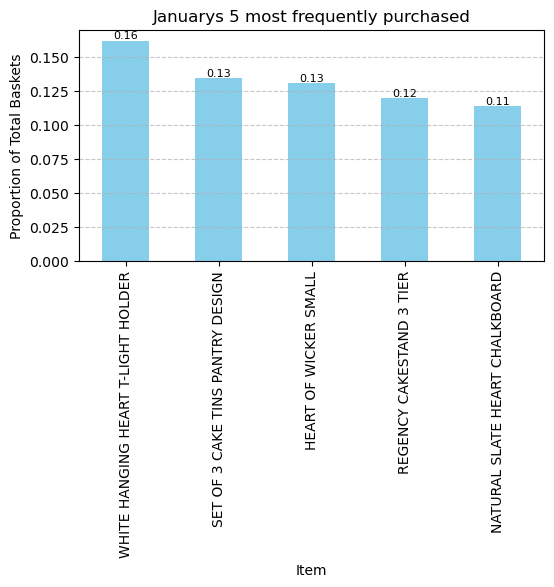

In [35]:
plt.figure(figsize=(6, 3))
ax = items_frequency[:5].plot(kind='bar', color='skyblue', width=0.5)
plt.title('Januarys 5 most frequently purchased')
plt.xlabel('Item')
plt.ylabel('Proportion of Total Baskets')
plt.xticks(rotation=90)

# Add annotations above each bar
for i, v in enumerate(items_frequency[:5]):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

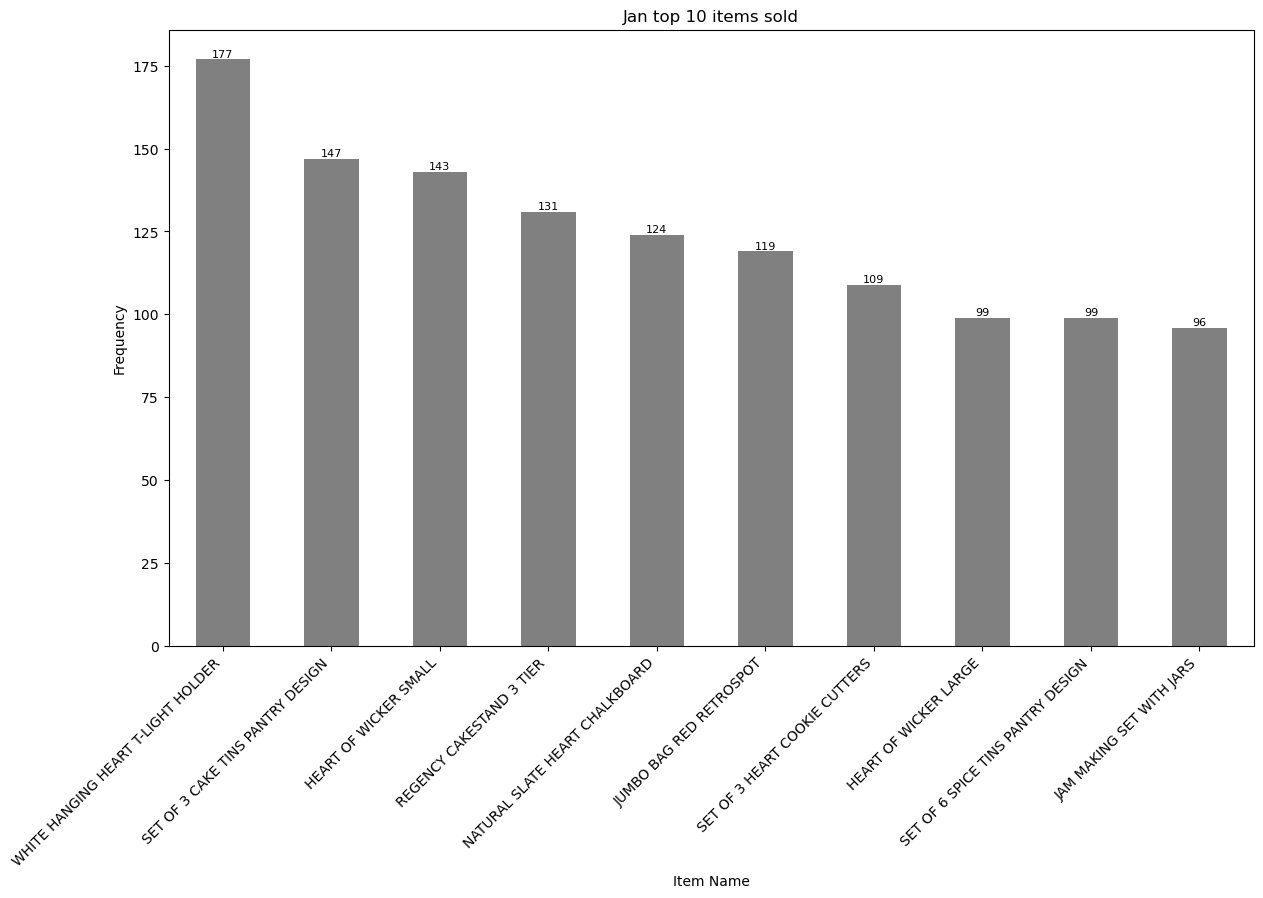

In [36]:
plt.figure(figsize=(14, 8))
top_items = january_data['Itemname'].value_counts().head(10)
top_items.plot(kind='bar', color='grey')
plt.title('Jan top 10 items sold')
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add numbers at the top of each bar
for i, freq in enumerate(top_items):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=8)

plt.show()

In [37]:
#transforms into binary format
basket_sets = basket.apply(lambda x: x > 0, axis=1)

basket_sets

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,counted,damages,found,label mix up,mouldy thrown away.,reverse 21/5/10 adjustment,samples/damages
BillNo,,,,,,,,,,,,,,,,,,,,,
539993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
540001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
540002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
540003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
540004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542741,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
542743,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
542745,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# set parameters
min_support= .03
min_confidence = .5
max_length = 2

In [39]:
# Generate frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=min_support,  use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.031164                 (3 HOOK PHOTO SHELF ANTIQUE WHITE)
1    0.061412                           (6 RIBBONS RUSTIC CHARM)
2    0.036664                       (6 RIBBONS SHIMMERING PINKS)
3    0.032997                  (60 CAKE CASES DOLLY GIRL DESIGN)
4    0.054079                      (60 TEATIME FAIRY CAKE CASES)
..        ...                                                ...
258  0.032997  (RED RETROSPOT CHARLOTTE BAG, WOODLAND CHARLOT...
259  0.063245  (SET OF 6 SPICE TINS PANTRY DESIGN, SET OF 3 C...
260  0.030247  (SET OF 3 CAKE TINS PANTRY DESIGN, WHITE HANGI...
261  0.032081  (SET OF 6 SPICE TINS PANTRY DESIGN, SET OF 6 H...
262  0.030247  (HEART OF WICKER LARGE, WHITE HANGING HEART T-...

[263 rows x 2 columns]


In [40]:
# Generate association rules
selected_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)[selected_columns]
rules[:20]

,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.032081,0.603448,10.972701
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.032081,0.583333,10.972701
2,(CANDLEHOLDER PINK HANGING HEART),(WHITE HANGING HEART T-LIGHT HOLDER),0.042163,0.666667,4.228682
3,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.030247,0.532258,8.539611
4,(DOTCOM POSTAGE),(JUMBO BAG RED RETROSPOT),0.035747,0.639344,5.861551
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.034830,0.666667,12.540230
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.034830,0.655172,12.540230
7,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.065995,0.727273,5.749671
8,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.065995,0.521739,5.749671
9,(JAM MAKING SET WITH JARS),(SET OF 3 CAKE TINS PANTRY DESIGN),0.047663,0.553191,4.162289


In [41]:
#Combining antecdents and consequents into identifiable itemset pairings
rules['itemsets'] = rules['antecedents'].apply(lambda x: ', '.join(map(str, x))) + ' -> ' + rules['consequents'].apply(lambda x: ', '.join(map(str, x)))


In [42]:
#sort rules by Support
rules.sort_values(by="support", ascending= False)[:11]

,antecedents,consequents,support,confidence,lift,itemsets
7,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.065995,0.727273,5.749671,HEART OF WICKER LARGE -> HEART OF WICKER SMALL
8,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.065995,0.521739,5.749671,HEART OF WICKER SMALL -> HEART OF WICKER LARGE
22,(SET OF 6 SPICE TINS PANTRY DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN),0.063245,0.726316,5.464900,SET OF 6 SPICE TINS PANTRY DESIGN -> SET OF 3 ...
19,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.050412,0.632184,4.009957,RED HANGING HEART T-LIGHT HOLDER -> WHITE HANG...
9,(JAM MAKING SET WITH JARS),(SET OF 3 CAKE TINS PANTRY DESIGN),0.047663,0.553191,4.162289,JAM MAKING SET WITH JARS -> SET OF 3 CAKE TINS...
11,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.042163,0.605263,5.549093,JUMBO BAG PINK POLKADOT -> JUMBO BAG RED RETRO...
2,(CANDLEHOLDER PINK HANGING HEART),(WHITE HANGING HEART T-LIGHT HOLDER),0.042163,0.666667,4.228682,CANDLEHOLDER PINK HANGING HEART -> WHITE HANGI...
18,(RECIPE BOX PANTRY YELLOW DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN),0.038497,0.575342,4.328956,RECIPE BOX PANTRY YELLOW DESIGN -> SET OF 3 CA...
14,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.036664,0.579710,5.314822,JUMBO STORAGE BAG SUKI -> JUMBO BAG RED RETROSPOT
4,(DOTCOM POSTAGE),(JUMBO BAG RED RETROSPOT),0.035747,0.639344,5.861551,DOTCOM POSTAGE -> JUMBO BAG RED RETROSPOT


C:\Users\alons\AppData\Local\Temp\ipykernel_14372\2279641058.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


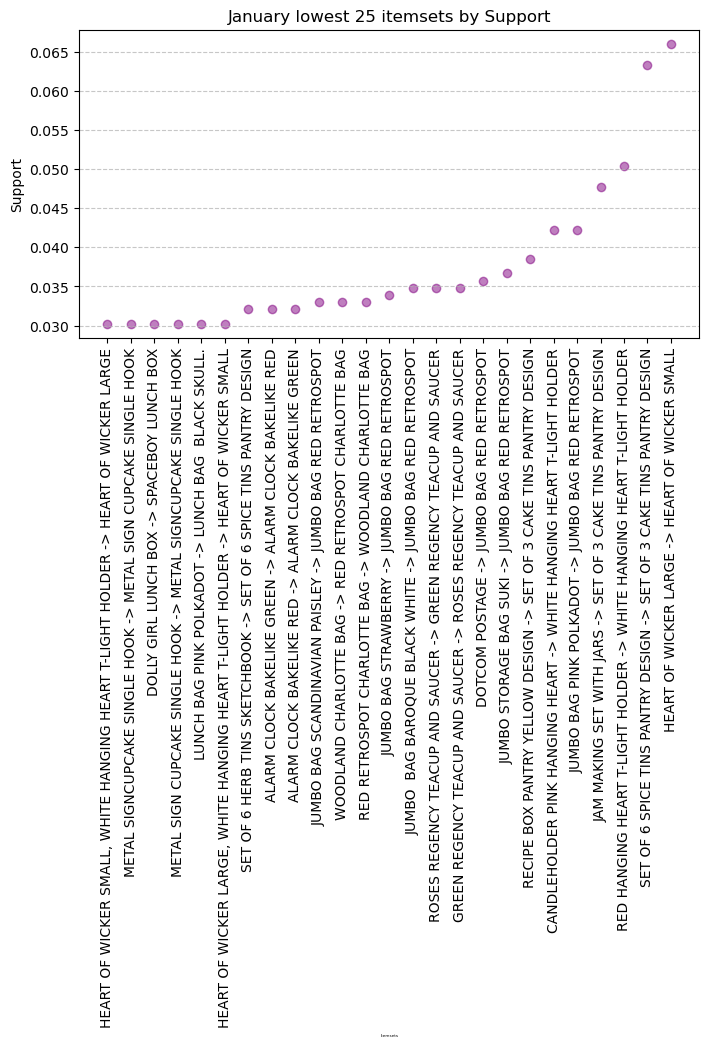

In [43]:
lowest_25_rules = rules.sort_values(by='support', ascending=True).head(25)

# Plot the lowest 25 rules by confidence
plt.figure(figsize=(8, 4))
plt.scatter(lowest_25_rules['itemsets'], lowest_25_rules['support'], color='purple', alpha=0.5)  
plt.xlabel('Itemsets', fontsize=3)
plt.ylabel('Support')
plt.title('January lowest 25 itemsets by Support')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  
plt.tight_layout()  

In [44]:
#sort and plot rules by Condfidence
rules.sort_values(by="confidence", ascending= True)[:11]

,antecedents,consequents,support,confidence,lift,itemsets
8,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.065995,0.521739,5.749671,HEART OF WICKER SMALL -> HEART OF WICKER LARGE
3,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.030247,0.532258,8.539611,DOLLY GIRL LUNCH BOX -> SPACEBOY LUNCH BOX
9,(JAM MAKING SET WITH JARS),(SET OF 3 CAKE TINS PANTRY DESIGN),0.047663,0.553191,4.162289,JAM MAKING SET WITH JARS -> SET OF 3 CAKE TINS...
15,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.030247,0.559322,8.973829,LUNCH BAG PINK POLKADOT -> LUNCH BAG BLACK SK...
21,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.032997,0.571429,10.566586,WOODLAND CHARLOTTE BAG -> RED RETROSPOT CHARLO...
18,(RECIPE BOX PANTRY YELLOW DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN),0.038497,0.575342,4.328956,RECIPE BOX PANTRY YELLOW DESIGN -> SET OF 3 CA...
14,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.036664,0.579710,5.314822,JUMBO STORAGE BAG SUKI -> JUMBO BAG RED RETROSPOT
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.032081,0.583333,10.972701,ALARM CLOCK BAKELIKE RED -> ALARM CLOCK BAKELI...
13,(JUMBO BAG STRAWBERRY),(JUMBO BAG RED RETROSPOT),0.033914,0.587302,5.384420,JUMBO BAG STRAWBERRY -> JUMBO BAG RED RETROSPOT
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.032081,0.603448,10.972701,ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKE...


C:\Users\alons\AppData\Local\Temp\ipykernel_14372\2574437010.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


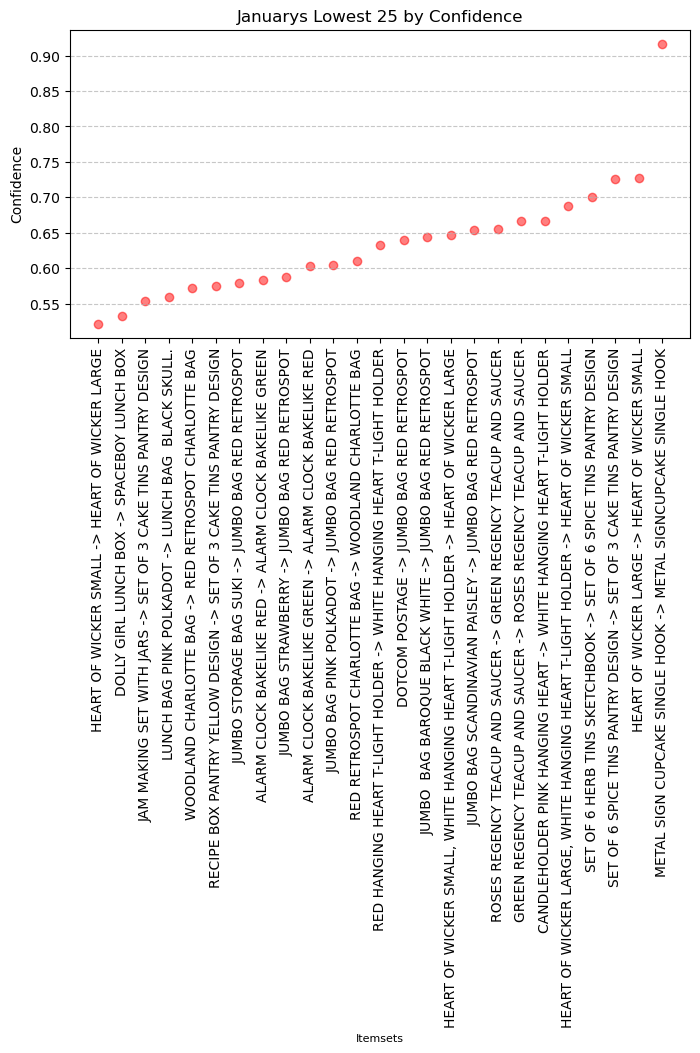

In [45]:
lowest_25_rules = rules.sort_values(by='confidence', ascending=True).head(25)

# Plot the lowest 25 rules by confidence
plt.figure(figsize=(8, 4))
plt.scatter(lowest_25_rules['itemsets'], lowest_25_rules['confidence'], color='red', alpha=0.5)
plt.xlabel('Itemsets', fontsize=8)
plt.ylabel('Confidence')
plt.title('Januarys Lowest 25 by Confidence')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [46]:
#Sort rules by Lift
rules.sort_values(by="lift", ascending=False)[:11]

,antecedents,consequents,support,confidence,lift,itemsets
17,(METAL SIGNCUPCAKE SINGLE HOOK),(METAL SIGN CUPCAKE SINGLE HOOK),0.030247,0.916667,27.780093,METAL SIGNCUPCAKE SINGLE HOOK -> METAL SIGN CU...
16,(METAL SIGN CUPCAKE SINGLE HOOK),(METAL SIGNCUPCAKE SINGLE HOOK),0.030247,0.916667,27.780093,METAL SIGN CUPCAKE SINGLE HOOK -> METAL SIGNCU...
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.034830,0.666667,12.540230,GREEN REGENCY TEACUP AND SAUCER -> ROSES REGEN...
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.034830,0.655172,12.540230,ROSES REGENCY TEACUP AND SAUCER -> GREEN REGEN...
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.032081,0.603448,10.972701,ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKE...
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.032081,0.583333,10.972701,ALARM CLOCK BAKELIKE RED -> ALARM CLOCK BAKELI...
21,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.032997,0.571429,10.566586,WOODLAND CHARLOTTE BAG -> RED RETROSPOT CHARLO...
20,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.032997,0.610169,10.566586,RED RETROSPOT CHARLOTTE BAG -> WOODLAND CHARLO...
15,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.030247,0.559322,8.973829,LUNCH BAG PINK POLKADOT -> LUNCH BAG BLACK SK...
3,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.030247,0.532258,8.539611,DOLLY GIRL LUNCH BOX -> SPACEBOY LUNCH BOX


In [47]:
rules.sort_values(by="lift", ascending=True)[:11]

,antecedents,consequents,support,confidence,lift,itemsets
19,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.050412,0.632184,4.009957,RED HANGING HEART T-LIGHT HOLDER -> WHITE HANG...
9,(JAM MAKING SET WITH JARS),(SET OF 3 CAKE TINS PANTRY DESIGN),0.047663,0.553191,4.162289,JAM MAKING SET WITH JARS -> SET OF 3 CAKE TINS...
2,(CANDLEHOLDER PINK HANGING HEART),(WHITE HANGING HEART T-LIGHT HOLDER),0.042163,0.666667,4.228682,CANDLEHOLDER PINK HANGING HEART -> WHITE HANGI...
18,(RECIPE BOX PANTRY YELLOW DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN),0.038497,0.575342,4.328956,RECIPE BOX PANTRY YELLOW DESIGN -> SET OF 3 CA...
14,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.036664,0.579710,5.314822,JUMBO STORAGE BAG SUKI -> JUMBO BAG RED RETROSPOT
13,(JUMBO BAG STRAWBERRY),(JUMBO BAG RED RETROSPOT),0.033914,0.587302,5.384420,JUMBO BAG STRAWBERRY -> JUMBO BAG RED RETROSPOT
24,"(HEART OF WICKER LARGE, WHITE HANGING HEART T-...",(HEART OF WICKER SMALL),0.030247,0.687500,5.435236,"HEART OF WICKER LARGE, WHITE HANGING HEART T-L..."
22,(SET OF 6 SPICE TINS PANTRY DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN),0.063245,0.726316,5.464900,SET OF 6 SPICE TINS PANTRY DESIGN -> SET OF 3 ...
11,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.042163,0.605263,5.549093,JUMBO BAG PINK POLKADOT -> JUMBO BAG RED RETRO...
7,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.065995,0.727273,5.749671,HEART OF WICKER LARGE -> HEART OF WICKER SMALL


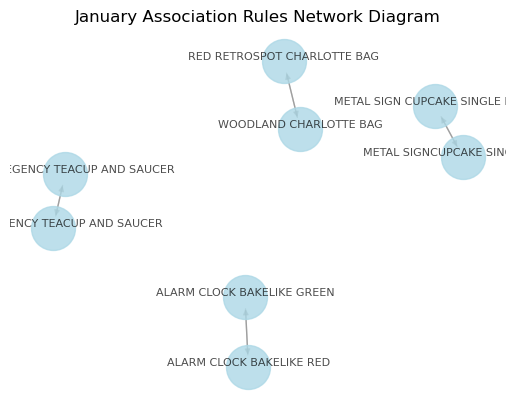

In [48]:
# Creating a threshold to get the top listed by "lift"
threshold_lift = 9
filtered_rules = rules[rules['lift'] >= threshold_lift]

# Create a directed graph
G = nx.DiGraph()

# Add nodes for antecedents and consequents
for _, row in filtered_rules.iterrows():
    for item in row['antecedents']:
        G.add_node(item)
    for item in row['consequents']:
        G.add_node(item)

# Add edges between antecedents and consequents
for _, row in filtered_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent)

# Set positions for nodes
pos = nx.spring_layout(G, scale=1000, k=1/len(G)**.1)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, arrowsize=8, alpha=0.5)

# Add labels with adjusted positioning
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif', alpha=0.7, verticalalignment='bottom')

# Display the plot
plt.title('January Association Rules Network Diagram')
plt.axis('off')
plt.show()

C:\Users\alons\AppData\Local\Temp\ipykernel_14372\2052165012.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


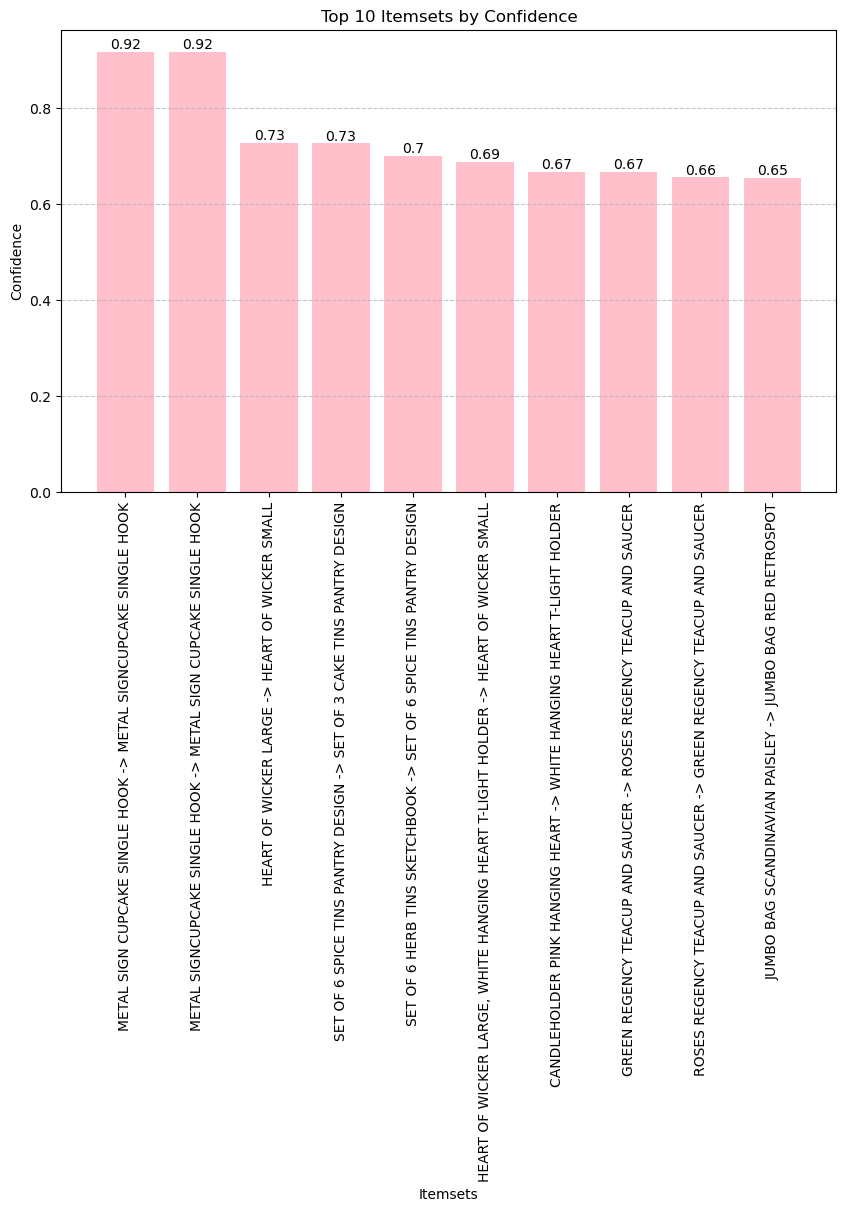

In [49]:
top_n_itemsets= rules.sort_values(by='confidence', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_n_itemsets['itemsets'], top_n_itemsets['confidence'], color='pink')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2, bars[i].get_height(), round(top_n_itemsets['confidence'].iloc[i], 2), 
             ha='center', va='bottom')

plt.title(f'Top 10 Itemsets by Confidence')
plt.xlabel('Itemsets')
plt.ylabel('Confidence')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\alons\AppData\Local\Temp\ipykernel_14372\1580976476.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


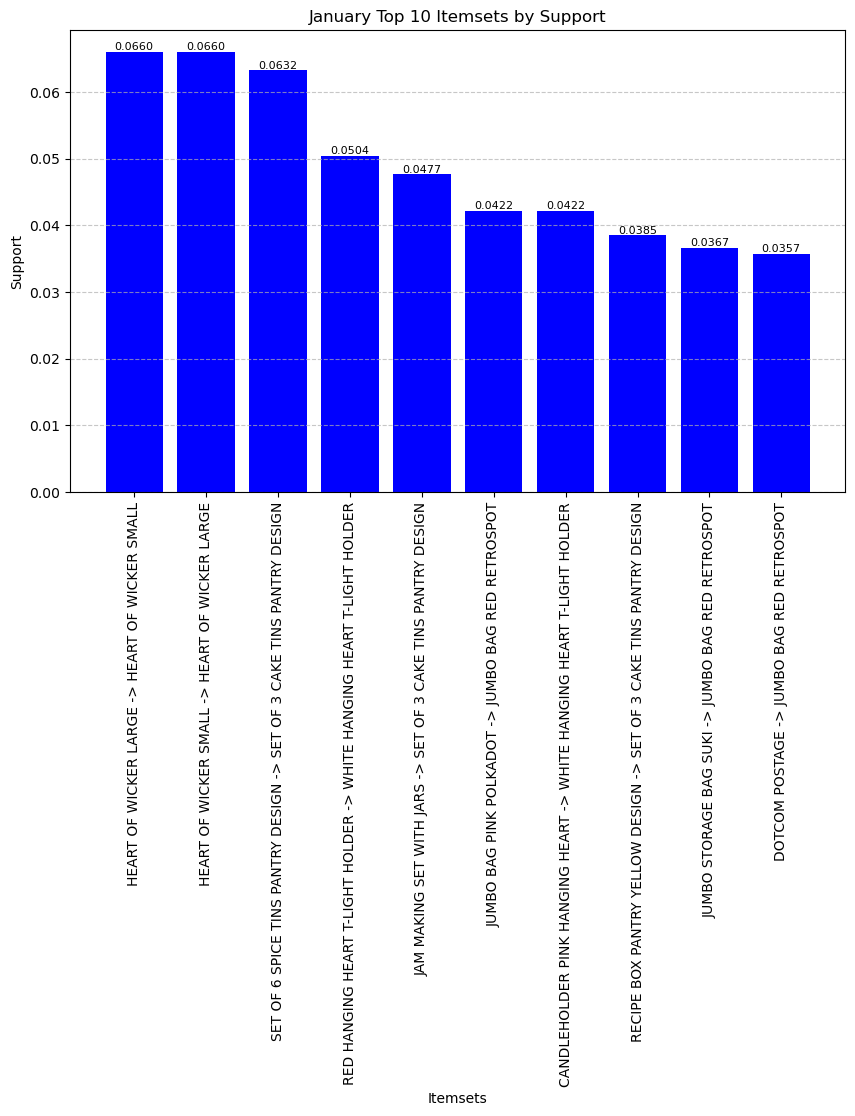

In [50]:
top_n_itemsets = rules.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_n_itemsets['itemsets'], top_n_itemsets['support'], color='blue')
for bar, support in zip(bars, top_n_itemsets['support']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{support * 1:.4f}', 
             ha='center', va='bottom', color='black', fontsize=8)

plt.title('January Top 10 Itemsets by Support')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()